# Customer Segmentation

Begin with standard imports:

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load data from CSV file

In [2]:
data=pd.read_csv('Mall_Customers.csv')

To view first five rows of the data:

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


To view last five rows of the data:

In [4]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


To view shape of the data:


Calling the shape attribute of a dataframe will return a tuple containing the dimensions(rowsxcolumns)of a dataframe.

In [5]:
data.shape

(200, 5)

To see size of the data:

In [6]:
data.size

1000

To view count of values avaiable in each column:

In [7]:
data.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

To view the count of males and females:

In [8]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Replacing male and female by 0 and 1 respectively under the 'Gender' column.

In [9]:
data['Gender'].replace(['Male', 'Female'], [0, 1], inplace = True)
data['Gender'].value_counts()

1    112
0     88
Name: Gender, dtype: int64

In [10]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


**countplot** function is used to ceate count plots

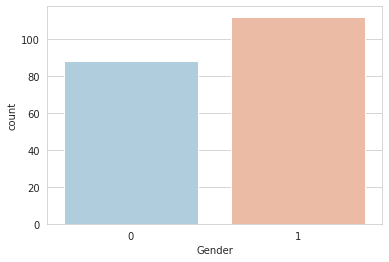

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=data,palette='RdBu_r')


Graphical representation of **Age**:

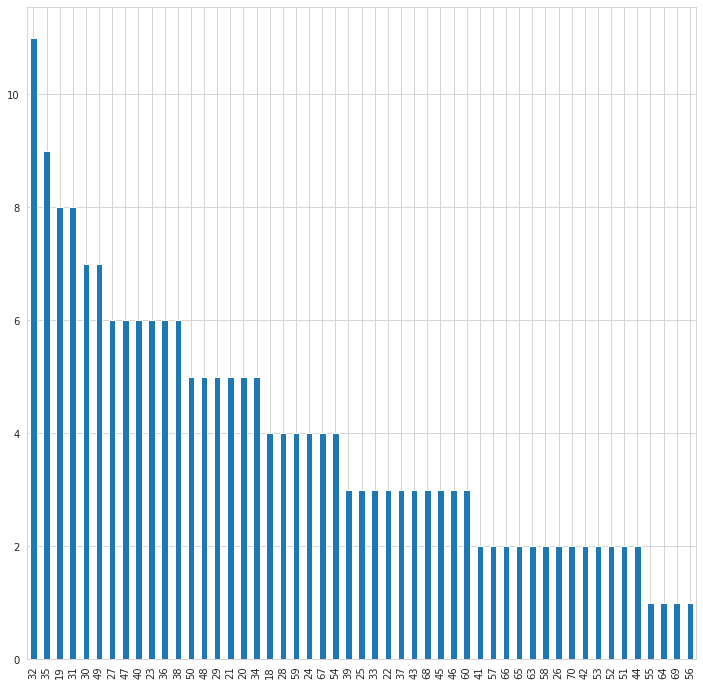

In [12]:
data['Age'].value_counts().plot.bar(figsize=(12,12))

Graphical representation of **Annual Income (k$)**:

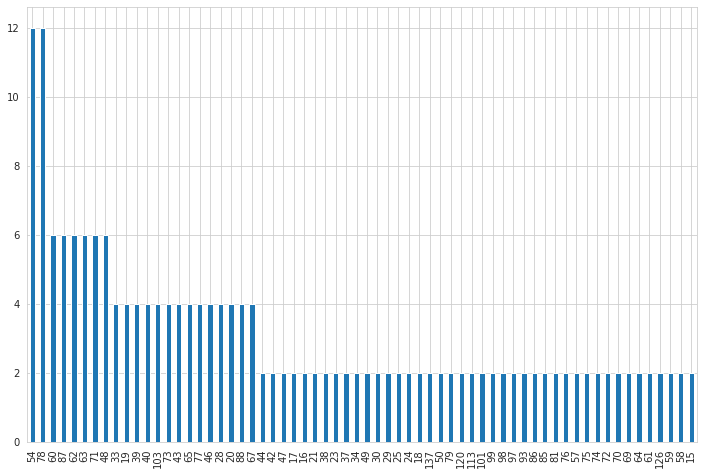

In [13]:
data['Annual Income (k$)'].value_counts().plot.bar(figsize=(12,8))

Graphical representation of **Spending Score (1-100)**:

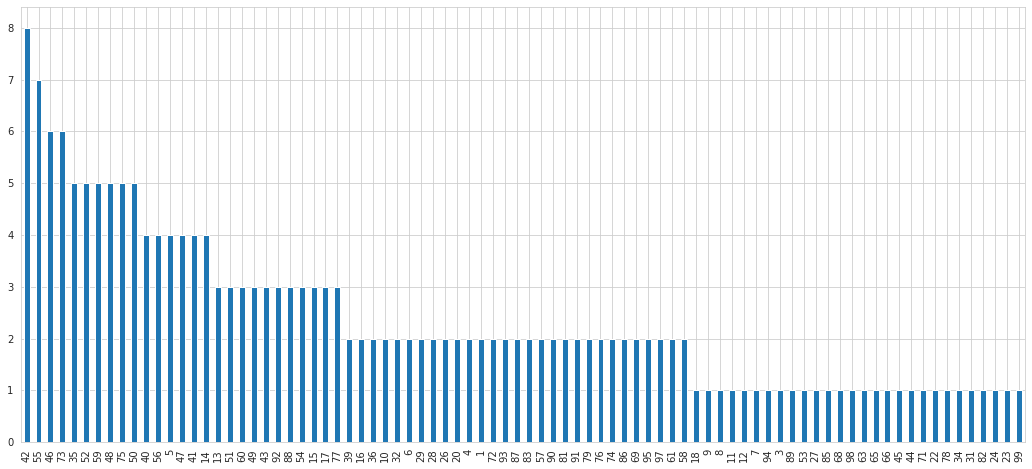

In [14]:
data['Spending Score (1-100)'].value_counts().plot.bar(figsize=(18,8))

Use **pairplot function** to create a grid of axes such that each variable in data will be shared in the y-axis across a single row and in the x-axis across a single column.

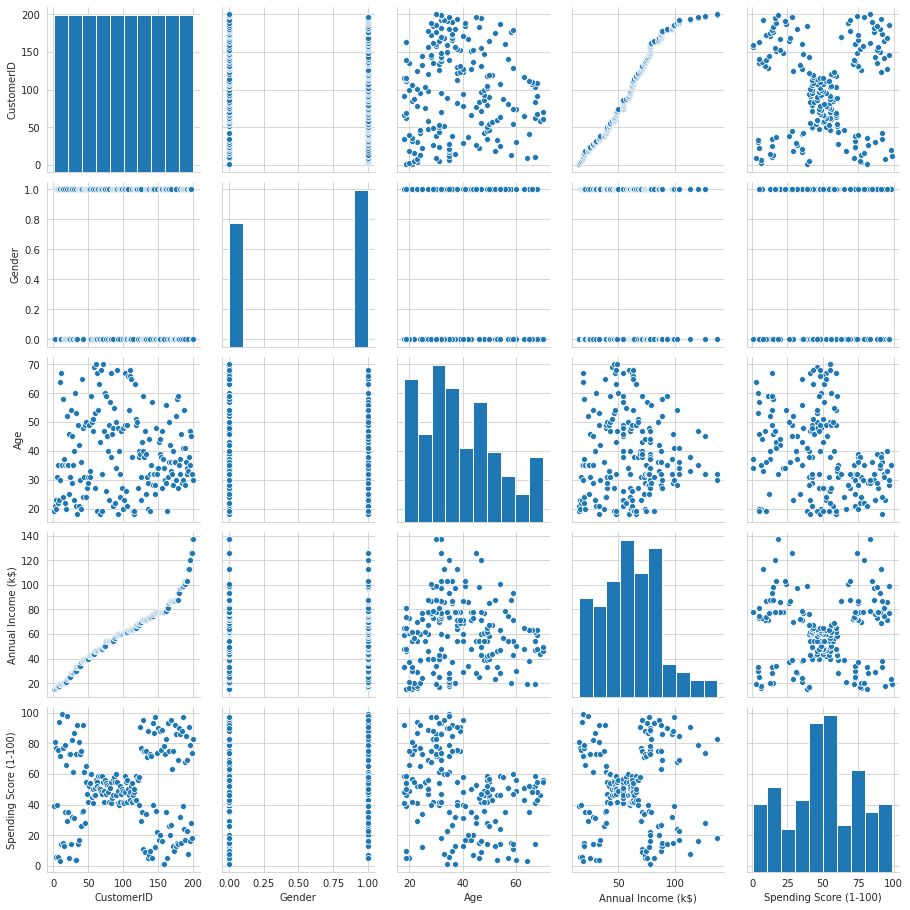

In [15]:
sns.pairplot(data)

#Creating Histograms 

Text(0, 0.5, 'Count')

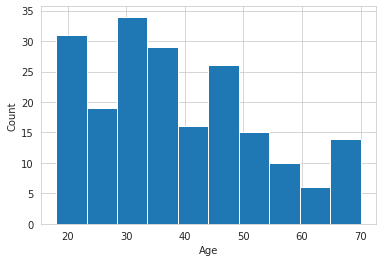

In [16]:
sns.set_style('whitegrid')
data['Age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

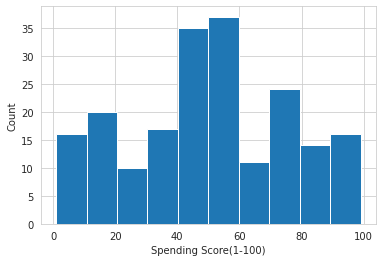

In [17]:
sns.set_style('whitegrid')
data['Spending Score (1-100)'].hist()
plt.xlabel('Spending Score(1-100)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

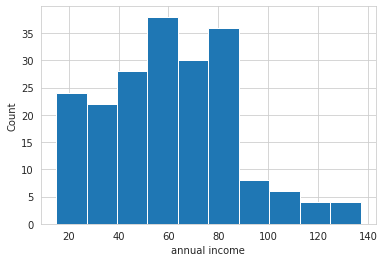

In [18]:
sns.set_style('whitegrid')
data['Annual Income (k$)'].hist()
plt.xlabel('annual income')
plt.ylabel('Count')

# Data Selection

The iloc indexer is used for integer-location based indexing/selection by position.



In [19]:
x=data.iloc[:,[3,4]].values
print(x.shape)

(200, 2)


# k-means clustering

First using elbow method let's determine the number of clusters in a data set.It helps us to choose a number of clusters such that adding another cluster doesnt give much better modeling of the data.

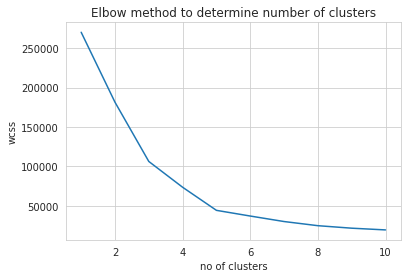

In [20]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow method to determine number of clusters')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

Here we can clearly see that optimal number of clusters is 5.

In [21]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

Classification of  data into 5 clusters using k-means.

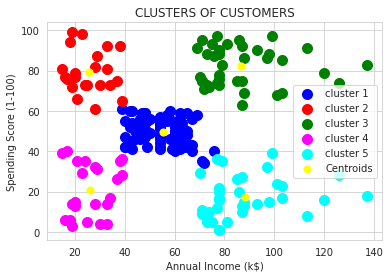

In [22]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='blue',label='cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='red',label='cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='magenta',label='cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='cyan',label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='yellow',label='Centroids')
plt.title('CLUSTERS OF CUSTOMERS')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Clusters of customers based on gender**

In [23]:
x=data.iloc[:,[1,4]].values
print(x.shape)

(200, 2)


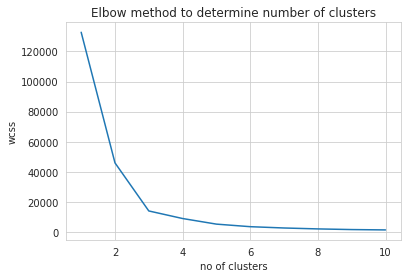

In [24]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow method to determine number of clusters')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

Here we can observe that optimal number of clusters is 3.

Classification of data into 3 clusters using k-means.

In [25]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

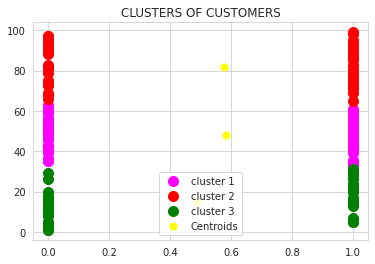

In [26]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='magenta',label='cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='red',label='cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='cluster 3')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='yellow',label='Centroids')
plt.title('CLUSTERS OF CUSTOMERS')

plt.legend()
plt.show()

**Clusters of customers based on their ages**


In [27]:
x=data.iloc[:,[2,4]].values
print(x.shape)

(200, 2)


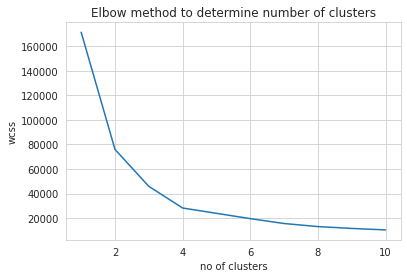

In [28]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow method to determine number of clusters')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

Here we can see that optimal number of clusters is 4.

Classification of data into 4 clusters using k-means.

In [29]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

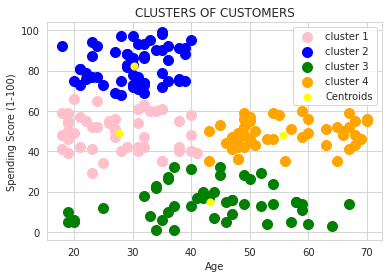

In [30]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='pink',label='cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='orange',label='cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='yellow',label='Centroids')
plt.title('CLUSTERS OF CUSTOMERS')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()